In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from keras.layers import Layer, Dense, Softmax
from keras import backend as K
from keras import Sequential

ModuleNotFoundError: No module named 'keras'

In [2]:
class RBFLayer(Layer):
    '''
    Una clase de capa para utilizar RBF(Radial Basis Function) en un modelo de Keras.
    
    Parameters
    ----------
    
    :units int:
        Cantidad de unidades de la capa.
    
    :gamma float:
        Parametro de influencia en la Función de base radial.
    
    '''
    
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [3]:
# Definición de la red RBF
model = Sequential()
model.add(Dense(20, input_shape=(4,),activation = 'relu'))
model.add(RBFLayer(20, 0.5, input_shape=(20,)))
model.add(Dense(1, input_shape=(20,), activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
data = pd.read_csv('sample_features2021-01-06.csv', index_col = 0)

In [5]:
data

source            target  connected  sum_of_papers  \
0       Ioannis M. Rekleitis     Gregory Dudek        1.0             55   
1           Oscar Gustafsson    Lars Wanhammar        1.0             17   
2           Mark A. Franklin        Tienyo Pan        1.0             22   
3                Judith Baur       Doug Arnold        1.0             15   
4               Jürgen Weese  Derek L. G. Hill        1.0             72   
...                      ...               ...        ...            ...   
149307     Roger Kenton Took     Aarno Lehtola        0.0              9   
149308      Norbert Ascheuer   Deborah F. Cook        0.0             10   
149309          René Mandiau    Jonathan K. Su        0.0             21   
149310     Gregg T. Vesonder      Ok-Bae Chang        0.0              6   
149311   Francois P. S. Chin     Mingfang Wang        0.0              9   

        sum_of_neighbors  log_secundary_neighbors  lenght_short_path  \
0                     25                 9.699411                1.0   
1                     10                 5.894403                1.0   
2                      7                 4.682131                1.0   
3                     27                10.509714                1.0   
4                    104                14.214428                1.0   
...                  ...                      ...                ...   
149307                 4                 4.605170                NaN   
149308                11                 7.003065                9.0   
149309                12                 8.131531                6.0   
149310                 8                 7.644919                6.0   
149311                12                 9.006999                6.0   

        clustering_index_sum  
0                   0.761905  
1                   1.178571  
2                   0.133333  
3                   0.985281  
4                   0.710248  
...                      ...  
149307              0.333333  
149308              0.619048  
149309              0.547619  
149310              1.000000  
149311              0.880952  

[149312 rows x 8 columns]

In [6]:
data_test = pd.read_csv('sample_features_test2021-01-06.csv', index_col = 0)

In [7]:
data_test

source                 target  connected  sum_of_papers  \
0           Hideaki Takanobu         Kayoko Ohtsuki        1.0             17   
1      Joseph Douglas Horton  Alejandro López-Ortiz        1.0             26   
2        Siddhartha R. Dalal            Ashish Jain        1.0             19   
3           Laurence Melloul            Armando Fox        1.0             21   
4           Riccardo Bettati          Wei Zhao 0001        1.0             76   
...                      ...                    ...        ...            ...   
38098         Florian Schiel       Walt Truszkowski        0.0             21   
38099          Goffredo Haus        Mizuho Iwaihara        0.0             10   
38100       Joe L. Armstrong       George T. Duncan        0.0             13   
38101        Wayne C. Boncyk           Mike Hinchey        0.0              6   
38102      Anantha Bangalore       Ronald J. Vetter        0.0             26   

       sum_of_neighbors  log_secundary_neighbors  lenght_short_path  \
0                    34                10.757477                1.0   
1                    25                11.075040                1.0   
2                    11                 7.494430                1.0   
3                    16                 8.034955                1.0   
4                    25                 9.294498                1.0   
...                 ...                      ...                ...   
38098                10                 5.023881                9.0   
38099                 9                 7.339538                6.0   
38100                 0                 0.000000                NaN   
38101                 2                 2.197225                NaN   
38102                 5                 3.401197                NaN   

       clustering_index_sum  
0                  1.407389  
1                  0.752381  
2                  0.800000  
3                  1.153846  
4                  1.109524  
...                     ...  
38098              0.300000  
38099              0.321429  
38100              0.000000  
38101              1.000000  
38102              0.100000  

[38103 rows x 8 columns]

In [8]:
# Variables a considerar, ignoramos el shortest_path_length
variables = data[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum','connected']]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [10]:
X_train = scaler.fit_transform(data[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum']].values)
y_train = data['connected'].values

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test = scaler.fit_transform(data_test[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum']].values)
y_test = data_test['connected'].values

In [12]:
X_train_nb = data[['sum_of_papers', 'sum_of_neighbors',
       'log_secundary_neighbors', 'clustering_index_sum']].values

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Definición de modelos
modelos_nombres = ["Decision Tree",
                   "SVM - Linear Kernel",
                   "SVM - RBF Kernel",
                   "K-Neighbors",
                   "Naive Bayes",
                   "Multi-Layer Perceptron"
                  ]
modelos = [RandomizedSearchCV(#Decision Tree
                estimator = DecisionTreeClassifier(),
                param_distributions =
                {
                   "criterion": ["entropy","gini"],
                   "max_depth":[2,4,6, None],
                   "min_samples_leaf":[60,70,80,90,100,110,120],
                   "max_features":["auto","sqrt"]
                },
                n_iter=60,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
           RandomizedSearchCV(#SVM - Linear 
                estimator = LinearSVC(),
                param_distributions =
                {
                   "C" : [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1.0],
                   "dual": [False]
                },
                n_iter=30,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
            RandomizedSearchCV(#SVM - RBF  - Es el optimo anterior, toma mucho tiempo ejecutarlo.
                estimator = SVC(),
                param_distributions =
                {
                   "kernel": ["rbf"],
                   "C" : [5.3],
                   "gamma" : ['auto'],
                   "class_weight" : [None]
                },
                n_iter=30,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
            RandomizedSearchCV(#K-Neighbors
                estimator = KNeighborsClassifier(),
                param_distributions =
                {
                   "n_neighbors": list(range(28,50)),
                   "weights" : ['uniform', 'distance'],
                   "metric" : ['minkowski'],
                   "p" : [1,2,3,4,5]
                },
                n_iter=100,
                cv=10,
                verbose=0,
                random_state=42,
                n_jobs=-1),
           GaussianNB(),
           MLPClassifier()#,
           #BaggingClassifier(n_jobs=-1)
          ]

In [14]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_fscore_support

resultados = []

bagging = np.zeros_like(y_test)

for i, modelo in enumerate(modelos):
    print(modelos_nombres[i])
    print(str(modelo))
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    bagging += y_pred.reshape(len(y_pred))
    try:
        bp = modelo.best_params_
        print("Mejores parámetros en CV Randomized Search:")
        print(bp)
    except:
        pass #Cuando no es CV
    print(classification_report(y_test, y_pred, target_names=['Colaboro', 'No colaboro']))
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
    resultados.append([modelos_nombres[i],
                       accuracy_score(y_test, y_pred),
                       p,
                       r,
                       f,
                       mean_squared_error(y_test, y_pred)])

model.fit(X_train, y_train, epochs=100, verbose=False)
y_pred = np.round(model.predict(X_test))
bagging += y_pred.reshape(len(y_pred))
loss,accuracy = model.evaluate(X_test, y_test,)
print(f"RBF Network Accuracy: {accuracy}")
p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
resultados.append(["RBF Network",
                    accuracy_score(y_test, y_pred),
                    p,
                    r,
                    f,
                    mean_squared_error(y_test, y_pred)])

Decision Tree
RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 4, 6, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [60, 70, 80, 90,
                                                             100, 110, 120]},
                   random_state=42)
Mejores parámetros en CV Randomized Search:
{'min_samples_leaf': 80, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
              precision    recall  f1-score   support

    Colaboro       0.84      0.82      0.83     20000
 No colaboro       0.81      0.82      0.82     18103

    accuracy                           0.82     38103
   macro avg       0.82      0.82      0.82     38103
weighted avg       0.82      0.82      0.82     38103

SVM - Linea

/home/mario/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=30. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros en CV Randomized Search:
{'dual': False, 'C': 0.01}
              precision    recall  f1-score   support

    Colaboro       0.80      0.88      0.84     20000
 No colaboro       0.85      0.76      0.80     18103

    accuracy                           0.82     38103
   macro avg       0.83      0.82      0.82     38103
weighted avg       0.83      0.82      0.82     38103

SVM - RBF Kernel
RandomizedSearchCV(cv=10, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [5.3], 'class_weight': [None],
                                        'gamma': ['auto'], 'kernel': ['rbf']},
                   random_state=42)


/home/mario/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=30. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros en CV Randomized Search:
{'kernel': 'rbf', 'gamma': 'auto', 'class_weight': None, 'C': 5.3}
              precision    recall  f1-score   support

    Colaboro       0.84      0.85      0.85     20000
 No colaboro       0.83      0.82      0.83     18103

    accuracy                           0.84     38103
   macro avg       0.84      0.84      0.84     38103
weighted avg       0.84      0.84      0.84     38103

K-Neighbors
RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['minkowski'],
                                        'n_neighbors': [28, 29, 30, 31, 32, 33,
                                                        34, 35, 36, 37, 38, 39,
                                                        40, 41, 42, 43, 44, 45,
                                                        46, 47, 48, 49],
                                        'p': [1, 2, 3, 4, 5],
        

In [15]:
y_pred = bagging > 3.0
p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
resultados.append(["Bagging",
                    accuracy_score(y_test, y_pred),
                    p,
                    r,
                    f,
                    mean_squared_error(y_test, y_pred)])

In [16]:
pd.DataFrame(resultados, columns=['Clasificador', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Squared Error'])

Clasificador  Accuracy  Precision    Recall  F1 Score  \
0           Decision Tree  0.824108   0.824390  0.824108  0.824175   
1     SVM - Linear Kernel  0.824056   0.826286  0.824056  0.823213   
2        SVM - RBF Kernel  0.837283   0.837241  0.837283  0.837205   
3             K-Neighbors  0.821405   0.821917  0.821405  0.821495   
4             Naive Bayes  0.766081   0.790621  0.766081  0.758491   
5  Multi-Layer Perceptron  0.837493   0.837549  0.837493  0.837514   
6             RBF Network  0.830827   0.833550  0.830827  0.830896   
7                 Bagging  0.835341   0.835322  0.835341  0.835232   

   Squared Error  
0       0.175892  
1       0.175944  
2       0.162717  
3       0.178595  
4       0.233919  
5       0.162507  
6       0.169173  
7       0.164659

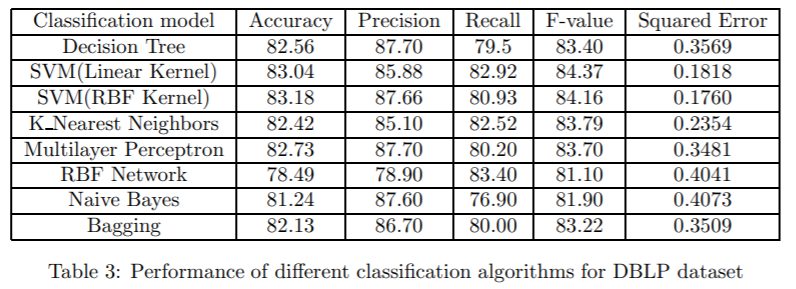